In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = 'data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = 'data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = 'data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [3]:
#Define NN architecture

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Dropout(0.3))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dropout(0.4))
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 135, 135, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 67, 67, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        8256      
__________

In [4]:
# compile the model
from keras.optimizers import RMSprop

piece_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [5]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='piece_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=1500, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/1500
Epoch 00000: val_loss improved from inf to 1.93953, saving model to piece_model.weights.best.hdf5
4s - loss: 1.9072 - acc: 0.2446 - val_loss: 1.9395 - val_acc: 0.1511
Epoch 2/1500
Epoch 00001: val_loss did not improve
2s - loss: 1.8536 - acc: 0.2491 - val_loss: 1.9489 - val_acc: 0.1511
Epoch 3/1500
Epoch 00002: val_loss did not improve
2s - loss: 1.8069 - acc: 0.2507 - val_loss: 1.9860 - val_acc: 0.1420
Epoch 4/1500
Epoch 00003: val_loss did not improve
2s - loss: 1.7909 - acc: 0.2716 - val_loss: 2.0259 - val_acc: 0.1631
Epoch 5/1500
Epoch 00004: val_loss did not improve
2s - loss: 1.7484 - acc: 0.2913 - val_loss: 2.1151 - val_acc: 0.1571
Epoch 6/1500
Epoch 00005: val_loss did not improve
2s - loss: 1.7174 - acc: 0.3003 - val_loss: 2.2203 - val_acc: 0.1420
Epoch 7/1500
Epoch 00006: val_loss did not improve
2s - loss: 1.6845 - acc: 0.3297 - val_loss: 2.2654 - val_acc: 0.1450
Epoch 8/1500
Epoch 00007: val_loss did not improve
2s - loss: 1.6755 - acc: 0.3316 - val_loss: 2.209

Epoch 00060: val_loss improved from 1.38059 to 1.35009, saving model to piece_model.weights.best.hdf5
2s - loss: 1.2927 - acc: 0.4908 - val_loss: 1.3501 - val_acc: 0.4079
Epoch 62/1500
Epoch 00061: val_loss improved from 1.35009 to 1.33675, saving model to piece_model.weights.best.hdf5
2s - loss: 1.3080 - acc: 0.4718 - val_loss: 1.3368 - val_acc: 0.4411
Epoch 63/1500
Epoch 00062: val_loss did not improve
2s - loss: 1.3175 - acc: 0.4740 - val_loss: 1.4083 - val_acc: 0.4079
Epoch 64/1500
Epoch 00063: val_loss did not improve
2s - loss: 1.2884 - acc: 0.4782 - val_loss: 1.4218 - val_acc: 0.3927
Epoch 65/1500
Epoch 00064: val_loss did not improve
2s - loss: 1.3258 - acc: 0.4903 - val_loss: 1.3817 - val_acc: 0.4290
Epoch 66/1500
Epoch 00065: val_loss did not improve
2s - loss: 1.2752 - acc: 0.4971 - val_loss: 1.3453 - val_acc: 0.4290
Epoch 67/1500
Epoch 00066: val_loss did not improve
2s - loss: 1.2778 - acc: 0.4814 - val_loss: 1.3624 - val_acc: 0.4350
Epoch 68/1500
Epoch 00067: val_loss imp

Epoch 00122: val_loss did not improve
2s - loss: 1.1494 - acc: 0.5389 - val_loss: 1.2249 - val_acc: 0.4985
Epoch 124/1500
Epoch 00123: val_loss did not improve
2s - loss: 1.1129 - acc: 0.5749 - val_loss: 1.2608 - val_acc: 0.4773
Epoch 125/1500
Epoch 00124: val_loss improved from 1.15558 to 1.12204, saving model to piece_model.weights.best.hdf5
2s - loss: 1.1331 - acc: 0.5776 - val_loss: 1.1220 - val_acc: 0.5347
Epoch 126/1500
Epoch 00125: val_loss did not improve
2s - loss: 1.1332 - acc: 0.5628 - val_loss: 1.2095 - val_acc: 0.4955
Epoch 127/1500
Epoch 00126: val_loss did not improve
2s - loss: 1.1054 - acc: 0.5645 - val_loss: 1.1239 - val_acc: 0.5529
Epoch 128/1500
Epoch 00127: val_loss did not improve
2s - loss: 1.1131 - acc: 0.5812 - val_loss: 1.1824 - val_acc: 0.5015
Epoch 129/1500
Epoch 00128: val_loss did not improve
2s - loss: 1.0934 - acc: 0.5753 - val_loss: 1.1760 - val_acc: 0.5438
Epoch 130/1500
Epoch 00129: val_loss did not improve
2s - loss: 1.1215 - acc: 0.5651 - val_loss: 

Epoch 00186: val_loss did not improve
2s - loss: 0.9914 - acc: 0.6354 - val_loss: 1.0404 - val_acc: 0.5921
Epoch 188/1500
Epoch 00187: val_loss did not improve
2s - loss: 1.0019 - acc: 0.6110 - val_loss: 1.0707 - val_acc: 0.5710
Epoch 189/1500
Epoch 00188: val_loss did not improve
2s - loss: 0.9817 - acc: 0.6174 - val_loss: 1.0363 - val_acc: 0.5921
Epoch 190/1500
Epoch 00189: val_loss did not improve
2s - loss: 0.9711 - acc: 0.6231 - val_loss: 1.0300 - val_acc: 0.5680
Epoch 191/1500
Epoch 00190: val_loss did not improve
2s - loss: 0.9773 - acc: 0.6325 - val_loss: 0.9801 - val_acc: 0.6073
Epoch 192/1500
Epoch 00191: val_loss did not improve
2s - loss: 0.9561 - acc: 0.6421 - val_loss: 0.9971 - val_acc: 0.6042
Epoch 193/1500
Epoch 00192: val_loss did not improve
2s - loss: 0.9985 - acc: 0.6372 - val_loss: 0.9998 - val_acc: 0.5831
Epoch 194/1500
Epoch 00193: val_loss did not improve
2s - loss: 0.9889 - acc: 0.6185 - val_loss: 1.0070 - val_acc: 0.5891
Epoch 195/1500
Epoch 00194: val_loss di

Epoch 00249: val_loss did not improve
2s - loss: 0.8701 - acc: 0.6569 - val_loss: 0.8573 - val_acc: 0.6798
Epoch 251/1500
Epoch 00250: val_loss did not improve
2s - loss: 0.8596 - acc: 0.6789 - val_loss: 0.8991 - val_acc: 0.6405
Epoch 252/1500
Epoch 00251: val_loss did not improve
2s - loss: 0.8569 - acc: 0.6744 - val_loss: 0.8576 - val_acc: 0.6495
Epoch 253/1500
Epoch 00252: val_loss did not improve
2s - loss: 0.8477 - acc: 0.6837 - val_loss: 0.8383 - val_acc: 0.6767
Epoch 254/1500
Epoch 00253: val_loss did not improve
2s - loss: 0.8171 - acc: 0.6918 - val_loss: 0.8667 - val_acc: 0.6767
Epoch 255/1500
Epoch 00254: val_loss improved from 0.82631 to 0.82106, saving model to piece_model.weights.best.hdf5
2s - loss: 0.8895 - acc: 0.6533 - val_loss: 0.8211 - val_acc: 0.6918
Epoch 256/1500
Epoch 00255: val_loss did not improve
2s - loss: 0.8617 - acc: 0.6766 - val_loss: 0.8950 - val_acc: 0.6556
Epoch 257/1500
Epoch 00256: val_loss did not improve
2s - loss: 0.8391 - acc: 0.6751 - val_loss: 

Epoch 00312: val_loss did not improve
2s - loss: 0.7715 - acc: 0.7128 - val_loss: 0.7367 - val_acc: 0.7311
Epoch 314/1500
Epoch 00313: val_loss did not improve
2s - loss: 0.7793 - acc: 0.7214 - val_loss: 0.6811 - val_acc: 0.7553
Epoch 315/1500
Epoch 00314: val_loss did not improve
2s - loss: 0.7245 - acc: 0.7245 - val_loss: 0.7335 - val_acc: 0.7251
Epoch 316/1500
Epoch 00315: val_loss did not improve
2s - loss: 0.7534 - acc: 0.7201 - val_loss: 0.7312 - val_acc: 0.7372
Epoch 317/1500
Epoch 00316: val_loss did not improve
2s - loss: 0.7705 - acc: 0.7002 - val_loss: 0.7065 - val_acc: 0.7583
Epoch 318/1500
Epoch 00317: val_loss did not improve
2s - loss: 0.7550 - acc: 0.7151 - val_loss: 0.7031 - val_acc: 0.7372
Epoch 319/1500
Epoch 00318: val_loss did not improve
2s - loss: 0.7426 - acc: 0.7270 - val_loss: 0.7208 - val_acc: 0.7311
Epoch 320/1500
Epoch 00319: val_loss did not improve
2s - loss: 0.7431 - acc: 0.7182 - val_loss: 0.7380 - val_acc: 0.7251
Epoch 321/1500
Epoch 00320: val_loss di

Epoch 00377: val_loss did not improve
2s - loss: 0.6733 - acc: 0.7390 - val_loss: 0.5886 - val_acc: 0.7855
Epoch 379/1500
Epoch 00378: val_loss did not improve
2s - loss: 0.6693 - acc: 0.7480 - val_loss: 0.6518 - val_acc: 0.7734
Epoch 380/1500
Epoch 00379: val_loss did not improve
2s - loss: 0.6631 - acc: 0.7589 - val_loss: 0.6451 - val_acc: 0.7795
Epoch 381/1500
Epoch 00380: val_loss did not improve
2s - loss: 0.6579 - acc: 0.7535 - val_loss: 0.7091 - val_acc: 0.7402
Epoch 382/1500
Epoch 00381: val_loss did not improve
2s - loss: 0.6714 - acc: 0.7399 - val_loss: 0.6173 - val_acc: 0.7704
Epoch 383/1500
Epoch 00382: val_loss improved from 0.56980 to 0.55280, saving model to piece_model.weights.best.hdf5
2s - loss: 0.6507 - acc: 0.7585 - val_loss: 0.5528 - val_acc: 0.8218
Epoch 384/1500
Epoch 00383: val_loss did not improve
2s - loss: 0.6361 - acc: 0.7605 - val_loss: 0.6025 - val_acc: 0.7764
Epoch 385/1500
Epoch 00384: val_loss did not improve
2s - loss: 0.6446 - acc: 0.7623 - val_loss: 

Epoch 00443: val_loss did not improve
2s - loss: 0.5590 - acc: 0.7973 - val_loss: 0.5928 - val_acc: 0.8006
Epoch 445/1500
Epoch 00444: val_loss did not improve
2s - loss: 0.5917 - acc: 0.7790 - val_loss: 0.5764 - val_acc: 0.7885
Epoch 446/1500
Epoch 00445: val_loss did not improve
2s - loss: 0.6056 - acc: 0.7636 - val_loss: 0.5964 - val_acc: 0.7946
Epoch 447/1500
Epoch 00446: val_loss did not improve
2s - loss: 0.6231 - acc: 0.7711 - val_loss: 0.5505 - val_acc: 0.7915
Epoch 448/1500
Epoch 00447: val_loss did not improve
2s - loss: 0.5637 - acc: 0.7997 - val_loss: 0.6063 - val_acc: 0.7976
Epoch 449/1500
Epoch 00448: val_loss improved from 0.50856 to 0.50202, saving model to piece_model.weights.best.hdf5
2s - loss: 0.5417 - acc: 0.8045 - val_loss: 0.5020 - val_acc: 0.8248
Epoch 450/1500
Epoch 00449: val_loss did not improve
2s - loss: 0.6278 - acc: 0.7728 - val_loss: 0.6046 - val_acc: 0.7855
Epoch 451/1500
Epoch 00450: val_loss did not improve
2s - loss: 0.6042 - acc: 0.7785 - val_loss: 

Epoch 00508: val_loss did not improve
2s - loss: 0.5011 - acc: 0.8144 - val_loss: 0.4500 - val_acc: 0.8520
Epoch 510/1500
Epoch 00509: val_loss did not improve
2s - loss: 0.5254 - acc: 0.7911 - val_loss: 0.4986 - val_acc: 0.8218
Epoch 511/1500
Epoch 00510: val_loss did not improve
2s - loss: 0.5019 - acc: 0.8240 - val_loss: 0.4828 - val_acc: 0.8218
Epoch 512/1500
Epoch 00511: val_loss did not improve
2s - loss: 0.5825 - acc: 0.7910 - val_loss: 0.5666 - val_acc: 0.8066
Epoch 513/1500
Epoch 00512: val_loss did not improve
2s - loss: 0.5579 - acc: 0.7920 - val_loss: 0.5808 - val_acc: 0.7825
Epoch 514/1500
Epoch 00513: val_loss did not improve
2s - loss: 0.5124 - acc: 0.8122 - val_loss: 0.5035 - val_acc: 0.8066
Epoch 515/1500
Epoch 00514: val_loss did not improve
2s - loss: 0.5274 - acc: 0.8037 - val_loss: 0.4635 - val_acc: 0.8459
Epoch 516/1500
Epoch 00515: val_loss did not improve
2s - loss: 0.5534 - acc: 0.7919 - val_loss: 0.5087 - val_acc: 0.8066
Epoch 517/1500
Epoch 00516: val_loss di

Epoch 00575: val_loss did not improve
2s - loss: 0.5148 - acc: 0.8177 - val_loss: 0.4345 - val_acc: 0.8489
Epoch 577/1500
Epoch 00576: val_loss did not improve
2s - loss: 0.4522 - acc: 0.8390 - val_loss: 0.4740 - val_acc: 0.8338
Epoch 578/1500
Epoch 00577: val_loss did not improve
2s - loss: 0.4978 - acc: 0.8175 - val_loss: 0.4468 - val_acc: 0.8429
Epoch 579/1500
Epoch 00578: val_loss did not improve
2s - loss: 0.4630 - acc: 0.8325 - val_loss: 0.4327 - val_acc: 0.8308
Epoch 580/1500
Epoch 00579: val_loss did not improve
2s - loss: 0.4792 - acc: 0.8264 - val_loss: 0.4521 - val_acc: 0.8369
Epoch 581/1500
Epoch 00580: val_loss did not improve
2s - loss: 0.4632 - acc: 0.8454 - val_loss: 0.5443 - val_acc: 0.8006
Epoch 582/1500
Epoch 00581: val_loss did not improve
2s - loss: 0.4972 - acc: 0.8158 - val_loss: 0.4242 - val_acc: 0.8489
Epoch 583/1500
Epoch 00582: val_loss did not improve
2s - loss: 0.5085 - acc: 0.8066 - val_loss: 0.4949 - val_acc: 0.8248
Epoch 584/1500
Epoch 00583: val_loss di

Epoch 00641: val_loss improved from 0.37334 to 0.37117, saving model to piece_model.weights.best.hdf5
2s - loss: 0.4614 - acc: 0.8311 - val_loss: 0.3712 - val_acc: 0.8580
Epoch 643/1500
Epoch 00642: val_loss did not improve
2s - loss: 0.4406 - acc: 0.8367 - val_loss: 0.4276 - val_acc: 0.8580
Epoch 644/1500
Epoch 00643: val_loss did not improve
2s - loss: 0.4513 - acc: 0.8209 - val_loss: 0.3840 - val_acc: 0.8822
Epoch 645/1500
Epoch 00644: val_loss did not improve
2s - loss: 0.4489 - acc: 0.8336 - val_loss: 0.3996 - val_acc: 0.8701
Epoch 646/1500
Epoch 00645: val_loss did not improve
2s - loss: 0.5118 - acc: 0.8148 - val_loss: 0.3871 - val_acc: 0.8701
Epoch 647/1500
Epoch 00646: val_loss did not improve
2s - loss: 0.4363 - acc: 0.8382 - val_loss: 0.4740 - val_acc: 0.8338
Epoch 648/1500
Epoch 00647: val_loss did not improve
2s - loss: 0.4561 - acc: 0.8399 - val_loss: 0.4243 - val_acc: 0.8731
Epoch 649/1500
Epoch 00648: val_loss did not improve
2s - loss: 0.4489 - acc: 0.8400 - val_loss: 

Epoch 00707: val_loss did not improve
2s - loss: 0.4096 - acc: 0.8477 - val_loss: 0.4105 - val_acc: 0.8580
Epoch 709/1500
Epoch 00708: val_loss did not improve
2s - loss: 0.4460 - acc: 0.8470 - val_loss: 0.3853 - val_acc: 0.8671
Epoch 710/1500
Epoch 00709: val_loss did not improve
2s - loss: 0.4475 - acc: 0.8386 - val_loss: 0.4151 - val_acc: 0.8580
Epoch 711/1500
Epoch 00710: val_loss did not improve
2s - loss: 0.3984 - acc: 0.8558 - val_loss: 0.4566 - val_acc: 0.8580
Epoch 712/1500
Epoch 00711: val_loss did not improve
2s - loss: 0.3849 - acc: 0.8550 - val_loss: 0.3883 - val_acc: 0.8580
Epoch 713/1500
Epoch 00712: val_loss did not improve
2s - loss: 0.3650 - acc: 0.8688 - val_loss: 0.4026 - val_acc: 0.8701
Epoch 714/1500
Epoch 00713: val_loss did not improve
2s - loss: 0.4024 - acc: 0.8535 - val_loss: 0.4749 - val_acc: 0.8036
Epoch 715/1500
Epoch 00714: val_loss did not improve
2s - loss: 0.4159 - acc: 0.8526 - val_loss: 0.4322 - val_acc: 0.8429
Epoch 716/1500
Epoch 00715: val_loss di

Epoch 00775: val_loss did not improve
2s - loss: 0.4011 - acc: 0.8578 - val_loss: 0.3767 - val_acc: 0.8671
Epoch 777/1500
Epoch 00776: val_loss did not improve
2s - loss: 0.4293 - acc: 0.8486 - val_loss: 0.3712 - val_acc: 0.8701
Epoch 778/1500
Epoch 00777: val_loss did not improve
2s - loss: 0.4509 - acc: 0.8306 - val_loss: 0.5021 - val_acc: 0.8218
Epoch 779/1500
Epoch 00778: val_loss did not improve
2s - loss: 0.3921 - acc: 0.8586 - val_loss: 0.4446 - val_acc: 0.8550
Epoch 780/1500
Epoch 00779: val_loss did not improve
2s - loss: 0.4179 - acc: 0.8590 - val_loss: 0.3434 - val_acc: 0.8792
Epoch 781/1500
Epoch 00780: val_loss did not improve
2s - loss: 0.3651 - acc: 0.8598 - val_loss: 0.3710 - val_acc: 0.8520
Epoch 782/1500
Epoch 00781: val_loss did not improve
2s - loss: 0.3844 - acc: 0.8574 - val_loss: 0.4071 - val_acc: 0.8580
Epoch 783/1500
Epoch 00782: val_loss did not improve
2s - loss: 0.3828 - acc: 0.8630 - val_loss: 0.3705 - val_acc: 0.8792
Epoch 784/1500
Epoch 00783: val_loss di

Epoch 00842: val_loss did not improve
2s - loss: 0.3438 - acc: 0.8728 - val_loss: 0.2978 - val_acc: 0.8943
Epoch 844/1500
Epoch 00843: val_loss did not improve
2s - loss: 0.4103 - acc: 0.8469 - val_loss: 0.3122 - val_acc: 0.9003
Epoch 845/1500
Epoch 00844: val_loss did not improve
2s - loss: 0.3681 - acc: 0.8706 - val_loss: 0.4041 - val_acc: 0.8489
Epoch 846/1500
Epoch 00845: val_loss did not improve
2s - loss: 0.3922 - acc: 0.8567 - val_loss: 0.3587 - val_acc: 0.8731
Epoch 847/1500
Epoch 00846: val_loss did not improve
2s - loss: 0.3818 - acc: 0.8650 - val_loss: 0.3302 - val_acc: 0.8973
Epoch 848/1500
Epoch 00847: val_loss did not improve
2s - loss: 0.3393 - acc: 0.8743 - val_loss: 0.3734 - val_acc: 0.8852
Epoch 849/1500
Epoch 00848: val_loss did not improve
2s - loss: 0.3436 - acc: 0.8741 - val_loss: 0.3953 - val_acc: 0.8610
Epoch 850/1500
Epoch 00849: val_loss did not improve
2s - loss: 0.3438 - acc: 0.8736 - val_loss: 0.3095 - val_acc: 0.9033
Epoch 851/1500
Epoch 00850: val_loss im

Epoch 00909: val_loss did not improve
2s - loss: 0.3265 - acc: 0.8825 - val_loss: 0.3454 - val_acc: 0.8761
Epoch 911/1500
Epoch 00910: val_loss did not improve
2s - loss: 0.3250 - acc: 0.8816 - val_loss: 0.2928 - val_acc: 0.9063
Epoch 912/1500
Epoch 00911: val_loss did not improve
2s - loss: 0.3346 - acc: 0.8738 - val_loss: 0.2914 - val_acc: 0.9003
Epoch 913/1500
Epoch 00912: val_loss improved from 0.28949 to 0.27095, saving model to piece_model.weights.best.hdf5
2s - loss: 0.3385 - acc: 0.8670 - val_loss: 0.2709 - val_acc: 0.9184
Epoch 914/1500
Epoch 00913: val_loss did not improve
2s - loss: 0.3072 - acc: 0.8886 - val_loss: 0.4132 - val_acc: 0.8580
Epoch 915/1500
Epoch 00914: val_loss did not improve
2s - loss: 0.3253 - acc: 0.8745 - val_loss: 0.3205 - val_acc: 0.9003
Epoch 916/1500
Epoch 00915: val_loss did not improve
2s - loss: 0.3364 - acc: 0.8783 - val_loss: 0.3791 - val_acc: 0.8882
Epoch 917/1500
Epoch 00916: val_loss did not improve
2s - loss: 0.2897 - acc: 0.8904 - val_loss: 

Epoch 00976: val_loss did not improve
2s - loss: 0.3507 - acc: 0.8739 - val_loss: 0.3182 - val_acc: 0.8973
Epoch 978/1500
Epoch 00977: val_loss did not improve
2s - loss: 0.2981 - acc: 0.8863 - val_loss: 0.3695 - val_acc: 0.8640
Epoch 979/1500
Epoch 00978: val_loss did not improve
2s - loss: 0.3009 - acc: 0.8959 - val_loss: 0.2980 - val_acc: 0.8852
Epoch 980/1500
Epoch 00979: val_loss did not improve
2s - loss: 0.2977 - acc: 0.8862 - val_loss: 0.3273 - val_acc: 0.8943
Epoch 981/1500
Epoch 00980: val_loss did not improve
2s - loss: 0.2967 - acc: 0.9007 - val_loss: 0.3216 - val_acc: 0.9033
Epoch 982/1500
Epoch 00981: val_loss did not improve
2s - loss: 0.3479 - acc: 0.8780 - val_loss: 0.4314 - val_acc: 0.8369
Epoch 983/1500
Epoch 00982: val_loss did not improve
2s - loss: 0.2689 - acc: 0.9017 - val_loss: 0.3456 - val_acc: 0.8701
Epoch 984/1500
Epoch 00983: val_loss did not improve
2s - loss: 0.3371 - acc: 0.8769 - val_loss: 0.3138 - val_acc: 0.9033
Epoch 985/1500
Epoch 00984: val_loss di

Epoch 01043: val_loss did not improve
2s - loss: 0.2973 - acc: 0.8903 - val_loss: 0.3155 - val_acc: 0.9033
Epoch 1045/1500
Epoch 01044: val_loss did not improve
2s - loss: 0.2718 - acc: 0.9038 - val_loss: 0.3828 - val_acc: 0.8671
Epoch 1046/1500
Epoch 01045: val_loss did not improve
2s - loss: 0.2884 - acc: 0.9016 - val_loss: 0.3342 - val_acc: 0.9003
Epoch 1047/1500
Epoch 01046: val_loss did not improve
2s - loss: 0.2401 - acc: 0.9078 - val_loss: 0.3210 - val_acc: 0.9184
Epoch 1048/1500
Epoch 01047: val_loss did not improve
2s - loss: 0.2833 - acc: 0.8870 - val_loss: 0.3319 - val_acc: 0.9033
Epoch 1049/1500
Epoch 01048: val_loss did not improve
2s - loss: 0.2675 - acc: 0.9110 - val_loss: 0.3030 - val_acc: 0.8943
Epoch 1050/1500
Epoch 01049: val_loss did not improve
2s - loss: 0.2893 - acc: 0.8847 - val_loss: 0.3033 - val_acc: 0.9063
Epoch 1051/1500
Epoch 01050: val_loss did not improve
2s - loss: 0.2653 - acc: 0.9023 - val_loss: 0.2850 - val_acc: 0.9094
Epoch 1052/1500
Epoch 01051: val

Epoch 01110: val_loss did not improve
2s - loss: 0.2637 - acc: 0.9008 - val_loss: 0.3895 - val_acc: 0.8882
Epoch 1112/1500
Epoch 01111: val_loss did not improve
2s - loss: 0.3080 - acc: 0.8910 - val_loss: 0.3172 - val_acc: 0.9033
Epoch 1113/1500
Epoch 01112: val_loss did not improve
2s - loss: 0.2787 - acc: 0.9006 - val_loss: 0.3356 - val_acc: 0.8943
Epoch 1114/1500
Epoch 01113: val_loss did not improve
2s - loss: 0.2895 - acc: 0.8935 - val_loss: 0.2791 - val_acc: 0.9305
Epoch 1115/1500
Epoch 01114: val_loss did not improve
2s - loss: 0.3050 - acc: 0.8806 - val_loss: 0.2650 - val_acc: 0.9215
Epoch 1116/1500
Epoch 01115: val_loss did not improve
2s - loss: 0.2805 - acc: 0.8952 - val_loss: 0.2835 - val_acc: 0.9063
Epoch 1117/1500
Epoch 01116: val_loss did not improve
2s - loss: 0.2709 - acc: 0.8977 - val_loss: 0.3133 - val_acc: 0.8882
Epoch 1118/1500
Epoch 01117: val_loss did not improve
2s - loss: 0.2782 - acc: 0.9073 - val_loss: 0.3390 - val_acc: 0.9033
Epoch 1119/1500
Epoch 01118: val

Epoch 01177: val_loss did not improve
2s - loss: 0.2388 - acc: 0.9127 - val_loss: 0.2715 - val_acc: 0.9154
Epoch 1179/1500
Epoch 01178: val_loss did not improve
2s - loss: 0.2427 - acc: 0.9075 - val_loss: 0.2982 - val_acc: 0.9184
Epoch 1180/1500
Epoch 01179: val_loss did not improve
2s - loss: 0.2359 - acc: 0.9159 - val_loss: 0.3839 - val_acc: 0.9033
Epoch 1181/1500
Epoch 01180: val_loss did not improve
2s - loss: 0.2320 - acc: 0.9208 - val_loss: 0.3159 - val_acc: 0.9094
Epoch 1182/1500
Epoch 01181: val_loss did not improve
2s - loss: 0.2795 - acc: 0.9001 - val_loss: 0.2929 - val_acc: 0.9003
Epoch 1183/1500
Epoch 01182: val_loss did not improve
2s - loss: 0.2487 - acc: 0.9166 - val_loss: 0.3407 - val_acc: 0.8852
Epoch 1184/1500
Epoch 01183: val_loss did not improve
2s - loss: 0.2631 - acc: 0.9056 - val_loss: 0.3075 - val_acc: 0.9063
Epoch 1185/1500
Epoch 01184: val_loss did not improve
2s - loss: 0.2676 - acc: 0.9032 - val_loss: 0.2857 - val_acc: 0.9094
Epoch 1186/1500
Epoch 01185: val

Epoch 01243: val_loss did not improve
2s - loss: 0.2651 - acc: 0.9087 - val_loss: 0.2683 - val_acc: 0.9275
Epoch 1245/1500
Epoch 01244: val_loss did not improve
2s - loss: 0.2472 - acc: 0.9057 - val_loss: 0.3312 - val_acc: 0.8943
Epoch 1246/1500
Epoch 01245: val_loss did not improve
2s - loss: 0.2440 - acc: 0.9130 - val_loss: 0.2384 - val_acc: 0.9154
Epoch 1247/1500
Epoch 01246: val_loss did not improve
2s - loss: 0.2366 - acc: 0.9134 - val_loss: 0.2690 - val_acc: 0.9305
Epoch 1248/1500
Epoch 01247: val_loss did not improve
2s - loss: 0.2187 - acc: 0.9295 - val_loss: 0.3010 - val_acc: 0.9003
Epoch 1249/1500
Epoch 01248: val_loss did not improve
2s - loss: 0.2156 - acc: 0.9191 - val_loss: 0.2729 - val_acc: 0.9094
Epoch 1250/1500
Epoch 01249: val_loss did not improve
2s - loss: 0.2029 - acc: 0.9159 - val_loss: 0.2208 - val_acc: 0.9305
Epoch 1251/1500
Epoch 01250: val_loss did not improve
2s - loss: 0.2433 - acc: 0.9084 - val_loss: 0.2608 - val_acc: 0.9275
Epoch 1252/1500
Epoch 01251: val

Epoch 01310: val_loss did not improve
2s - loss: 0.2547 - acc: 0.9104 - val_loss: 0.3194 - val_acc: 0.9063
Epoch 1312/1500
Epoch 01311: val_loss did not improve
2s - loss: 0.2447 - acc: 0.9122 - val_loss: 0.2697 - val_acc: 0.9184
Epoch 1313/1500
Epoch 01312: val_loss did not improve
2s - loss: 0.2634 - acc: 0.9084 - val_loss: 0.4231 - val_acc: 0.8671
Epoch 1314/1500
Epoch 01313: val_loss did not improve
2s - loss: 0.2479 - acc: 0.9081 - val_loss: 0.4319 - val_acc: 0.8640
Epoch 1315/1500
Epoch 01314: val_loss did not improve
2s - loss: 0.2077 - acc: 0.9263 - val_loss: 0.2559 - val_acc: 0.9245
Epoch 1316/1500
Epoch 01315: val_loss did not improve
2s - loss: 0.2127 - acc: 0.9222 - val_loss: 0.2511 - val_acc: 0.9245
Epoch 1317/1500
Epoch 01316: val_loss did not improve
2s - loss: 0.2301 - acc: 0.9159 - val_loss: 0.2360 - val_acc: 0.9245
Epoch 1318/1500
Epoch 01317: val_loss did not improve
2s - loss: 0.2091 - acc: 0.9185 - val_loss: 0.2647 - val_acc: 0.9215
Epoch 1319/1500
Epoch 01318: val

Epoch 01377: val_loss did not improve
2s - loss: 0.2148 - acc: 0.9256 - val_loss: 0.2562 - val_acc: 0.9486
Epoch 1379/1500
Epoch 01378: val_loss did not improve
2s - loss: 0.2558 - acc: 0.9122 - val_loss: 0.2535 - val_acc: 0.9456
Epoch 1380/1500
Epoch 01379: val_loss did not improve
2s - loss: 0.2257 - acc: 0.9127 - val_loss: 0.3204 - val_acc: 0.9184
Epoch 1381/1500
Epoch 01380: val_loss did not improve
2s - loss: 0.2323 - acc: 0.9232 - val_loss: 0.3404 - val_acc: 0.9184
Epoch 1382/1500
Epoch 01381: val_loss did not improve
2s - loss: 0.2296 - acc: 0.9256 - val_loss: 0.2365 - val_acc: 0.9335
Epoch 1383/1500
Epoch 01382: val_loss did not improve
2s - loss: 0.2292 - acc: 0.9199 - val_loss: 0.2109 - val_acc: 0.9366
Epoch 1384/1500
Epoch 01383: val_loss did not improve
2s - loss: 0.1846 - acc: 0.9344 - val_loss: 0.2764 - val_acc: 0.9275
Epoch 1385/1500
Epoch 01384: val_loss did not improve
2s - loss: 0.2023 - acc: 0.9281 - val_loss: 0.2658 - val_acc: 0.9063
Epoch 1386/1500
Epoch 01385: val

Epoch 01444: val_loss did not improve
2s - loss: 0.2255 - acc: 0.9120 - val_loss: 0.2626 - val_acc: 0.9335
Epoch 1446/1500
Epoch 01445: val_loss did not improve
2s - loss: 0.1745 - acc: 0.9455 - val_loss: 0.1787 - val_acc: 0.9456
Epoch 1447/1500
Epoch 01446: val_loss did not improve
2s - loss: 0.2481 - acc: 0.9217 - val_loss: 0.2576 - val_acc: 0.9366
Epoch 1448/1500
Epoch 01447: val_loss did not improve
2s - loss: 0.2262 - acc: 0.9266 - val_loss: 0.2179 - val_acc: 0.9335
Epoch 1449/1500
Epoch 01448: val_loss did not improve
2s - loss: 0.2150 - acc: 0.9280 - val_loss: 0.2892 - val_acc: 0.9245
Epoch 1450/1500
Epoch 01449: val_loss did not improve
2s - loss: 0.1711 - acc: 0.9359 - val_loss: 0.2946 - val_acc: 0.9335
Epoch 1451/1500
Epoch 01450: val_loss did not improve
2s - loss: 0.1808 - acc: 0.9353 - val_loss: 0.1949 - val_acc: 0.9426
Epoch 1452/1500
Epoch 01451: val_loss did not improve
2s - loss: 0.2114 - acc: 0.9272 - val_loss: 0.2557 - val_acc: 0.9154
Epoch 1453/1500
Epoch 01452: val

In [6]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('piece_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.910447761194


In [7]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

10/10 [===========================>..] - ETA: 0s

In [8]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 3 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 1 1 4 1 1 1 1 4 1 1
 1 1 1 1 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 3 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3
 3 3 3 0 3 3 3 4 0 4 4 4 1 4 4 1 4 4 4 4 4 4 4 4 4 4 0 4 4 5 5 4 4 1 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [9]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [10]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [11]:
piece_test_iter.filenames

['bishop/1538778538.3017461.jpg',
 'bishop/1539025832.837544.jpg',
 'bishop/1539025486.6533895.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/1539025801.510389.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1539025373.0113628.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539025334.2429533.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1539023732.561326.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1539024760.3120384.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1539024593.521976.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1539024725.794323.jpg',
 'bishop/1539026035.275597.jpg',
 'bishop/1539024424.9014952.jpg',
 'bishop/1539024039.37

In [12]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [13]:
results

,Filename,Predictions,Truth
0,bishop/1538778538.3017461.jpg,bishop,bishop
1,bishop/1539025832.837544.jpg,bishop,bishop
2,bishop/1539025486.6533895.jpg,bishop,bishop
3,bishop/1538779519.5865016.jpg,bishop,bishop
4,bishop/1538778643.4925923.jpg,bishop,bishop
5,bishop/1539023363.830272.jpg,bishop,bishop
6,bishop/1539025801.510389.jpg,pawn,bishop
7,bishop/1538778410.6081142.jpg,bishop,bishop
8,bishop/1538778215.8878355.jpg,bishop,bishop
9,bishop/1538778752.467536.jpg,king,bishop


In [14]:
#Confusion Matrix
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=piece_test_iter.classes, y_pred=predicted_class_indices)
print(confusion_matrix)

[[42  1  1  3  0  0  0]
 [ 0 26  0  0  7  0  0]
 [ 2  2 54  1  2  0  0]
 [ 3  0  0 48  0  0  0]
 [ 2  3  0  0 25  2  0]
 [ 0  0  0  1  0 60  0]
 [ 0  0  0  0  0  0 50]]


In [15]:
print(labels)

{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


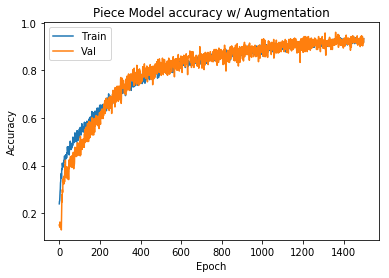

In [16]:
plt.plot(piece_hist.history['acc'])
plt.plot(piece_hist.history['val_acc'])
plt.title('Piece Model accuracy w/ Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

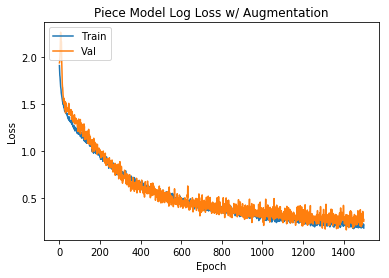

In [17]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Piece Model Log Loss w/ Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[42  1  1  3  0  0  0]
 [ 0 26  0  0  7  0  0]
 [ 2  2 54  1  2  0  0]
 [ 3  0  0 48  0  0  0]
 [ 2  3  0  0 25  2  0]
 [ 0  0  0  1  0 60  0]
 [ 0  0  0  0  0  0 50]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


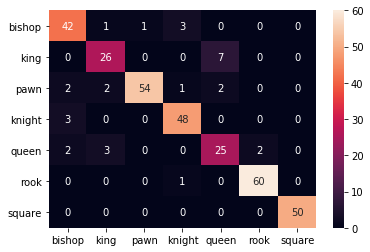

In [19]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

In [20]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

0.269091051679
